## Descripción del dataset: Pima Indians Diabetes

El **Pima Indians Diabetes Dataset** es un conjunto de datos clásico en Machine Learning y bioestadística, recopilado por el *National Institute of Diabetes and Digestive and Kidney Diseases*.  
Su propósito es **predecir la aparición de diabetes tipo 2** en mujeres de origen **pima** (una población indígena del sur de Arizona, EE.UU.), a partir de diversas variables clínicas y demográficas.

### Características principales:
- **Número de registros:** 392 (en esta versión limpia, el original tenía 768).  
- **Número de atributos (features):** 8 variables predictoras + 1 variable objetivo.  
- **Población:** Mujeres de al menos 21 años de edad de la etnia Pima.  
- **Tarea principal:** Clasificación binaria → determinar si una paciente tiene diabetes (`Outcome = 1`) o no (`Outcome = 0`).

### Variables:
1. **Pregnancies** → Número de embarazos.  
2. **Glucose** → Concentración de glucosa en plasma después de 2 horas en una prueba de tolerancia a la glucosa.  
3. **BloodPressure** → Presión arterial diastólica (mm Hg).  
4. **SkinThickness** → Espesor del pliegue cutáneo del tríceps (mm).  
5. **Insulin** → Nivel sérico de insulina (mu U/ml).  
6. **BMI** → Índice de masa corporal (peso en kg / altura² en m²).  
7. **DiabetesPedigreeFunction** → Probabilidad de diabetes basada en antecedentes familiares.  
8. **Age** → Edad en años.  
9. **Outcome** → Variable objetivo:  
   - `0` = No tiene diabetes  
   - `1` = Tiene diabetes  

### Relevancia:
Este dataset es ampliamente utilizado en cursos de **Inteligencia Artificial y Machine Learning** para enseñar:
- Procesamiento y limpieza de datos biomédicos.  
- Métodos de clasificación supervisada (KNN, regresión logística, Random Forest, SVM, redes neuronales, etc.).  
- Importancia de la normalización y estandarización en algoritmos basados en distancias.  

---


## Paso 1: Cargar la base de datos  
Cargamos el CSV en un `DataFrame` de `pandas`. Si tu archivo no se llama exactamente `cleaned_dataset.csv`, ajusta la ruta.

In [1]:
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")

# Vista rápida para verificar
print("Dimensiones del dataset:", df.shape)       # (filas, columnas)
print("Columnas:", list(df.columns))
df.head()  # muestra las primeras filas


Dimensiones del dataset: (392, 9)
Columnas: ['Pregnancies', 'Glucose', 'Blood Pressure', 'Skin Thickness', 'Insulin', 'BMI', 'Diabetes Pedigree Function', 'Age', 'Outcome']


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,0,129,110,46,130,67.1,0.319,26,1
1,0,180,78,63,14,59.4,2.420,25,1
2,3,123,100,35,240,57.3,0.880,22,0
3,1,88,30,42,99,55.0,0.496,26,1
4,0,162,76,56,100,53.2,0.759,25,1


In [2]:
# EDA rápida del CSV
import pandas as pd

df = pd.read_csv("cleaned_dataset.csv")
print("Shape:", df.shape)
display(df.head())
display(df.dtypes.to_frame("dtype"))
display(df.describe().T)

nulls = df.isnull().sum()
print("\nNulos por columna (si > 0):")
display(nulls[nulls > 0])

print("\nDistribución de Outcome:")
vc = df["Outcome"].value_counts().to_frame("count")
vc["pct"] = (vc["count"] / len(df)).round(3)
display(vc)


Shape: (392, 9)


,Pregnancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes Pedigree Function,Age,Outcome
0,0,129,110,46,130,67.1,0.319,26,1
1,0,180,78,63,14,59.4,2.420,25,1
2,3,123,100,35,240,57.3,0.880,22,0
3,1,88,30,42,99,55.0,0.496,26,1
4,0,162,76,56,100,53.2,0.759,25,1


,dtype
Pregnancies,int64
Glucose,int64
Blood Pressure,int64
Skin Thickness,int64
Insulin,int64
BMI,float64
Diabetes Pedigree Function,float64
Age,int64
Outcome,int64


,count,mean,std,min,25%,50%,75%,max
Pregnancies,392.0,3.301020,3.211424,0.000,1.00000,2.0000,5.000,17.00
Glucose,392.0,122.627551,30.860781,56.000,99.00000,119.0000,143.000,198.00
Blood Pressure,392.0,70.663265,12.496092,24.000,62.00000,70.0000,78.000,110.00
Skin Thickness,392.0,29.145408,10.516424,7.000,21.00000,29.0000,37.000,63.00
Insulin,392.0,156.056122,118.841690,14.000,76.75000,125.5000,190.000,846.00
BMI,392.0,33.086224,7.027659,18.200,28.40000,33.2000,37.100,67.10
Diabetes Pedigree Function,392.0,0.523046,0.345488,0.085,0.26975,0.4495,0.687,2.42
Age,392.0,30.864796,10.200777,21.000,23.00000,27.0000,36.000,81.00
Outcome,392.0,0.331633,0.471401,0.000,0.00000,0.0000,1.000,1.00



Nulos por columna (si > 0):


Series([], dtype: int64)


Distribución de Outcome:


,count,pct
Outcome,,
0,262,0.668
1,130,0.332


## Paso 2: Crear subconjuntos con 20 datos de **entrenamiento** y 20 de **testeo**
Seleccionaremos 40 muestras: 20 para entrenar y 20 para evaluar.

In [9]:
train_df = df.sample(n=20, random_state=42)
test_df  = df.drop(train_df.index).sample(n=20, random_state=24)

print(train_df.shape, test_df.shape)  # (20, 9) (20, 9)
train_df.head(), test_df.head()


(20, 9) (20, 9)


(     Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  \
 78             2      146              76              35      194  38.2   
 274            7       83              78              26       71  29.3   
 246            0      120              74              18       63  30.5   
 55             0       91              68              32      210  39.9   
 387            1       92              62              25       41  19.5   
 
      Diabetes Pedigree Function  Age  Outcome  
 78                        0.329   29        0  
 274                       0.767   36        0  
 246                       0.285   26        0  
 55                        0.381   25        0  
 387                       0.482   25        0  ,
      Pregnancies  Glucose  Blood Pressure  Skin Thickness  Insulin   BMI  \
 310            1       90              62              12       43  27.2   
 127            3      173              84              33      474  35.7   
 329      

## Paso 3: Implementar la función de distancia euclidiana

**Instrucciones:**
- Escribe una función en Python que reciba dos vectores y calcule la distancia euclidiana entre ellos.
- Utiliza la siguiente fórmula matemática para la distancia euclidiana entre dos vectores $x$ y $y$ de $n$ dimensiones:

$$
d(x, y) = \sqrt{\sum_{i=1}^{n} (x_i - y_i)^2}
$$

- Prueba tu función con los siguientes dos ejemplos (cada vector corresponde a una fila del dataset):

| Embarazos | Glucosa | Presión Arterial | Grosor Piel | Insulina | IMC  | Función Hereditaria | Edad | Resultado |
|-----------|---------|------------------|-------------|----------|------|---------------------|------|-----------|
|     1     |   106   |        70        |      28     |   135    | 34.2 |        0.142        |  22  |     0     |
|     2     |   102   |        86        |      36     |   120    | 45.5 |        0.127        |  23  |     1     |

- Calcula la distancia euclidiana a mano y luego verifica que el resultado de tu función sea el mismo.
- La función debe imprimir el resultado del cálculo de la distancia euclidiana con los datos presentados.



In [10]:
import numpy as np

def distancia_euclidiana(x, y):
    x, y = np.asarray(x, dtype=float), np.asarray(y, dtype=float)
    return float(np.sqrt(np.sum((x - y) ** 2)))

# Vectores del enunciado (sin la columna 'Resultado'):
# [Embarazos, Glucosa, Presión, GrosorPiel, Insulina, IMC, FunciónHereditaria, Edad]
v1 = [1, 106, 70, 28, 135, 34.2, 0.142, 22]
v2 = [2, 102, 86, 36, 120, 45.5, 0.127, 23]

# “Cálculo a mano”: suma de cuadrados y raíz
suma_cuadrados = sum((a - b) ** 2 for a, b in zip(v1, v2))
dist_mano = suma_cuadrados ** 0.5

# “Cálculo con la función”
dist_func = distancia_euclidiana(v1, v2)

print(f"Suma de cuadrados: {suma_cuadrados:.6f}")
print(f"Distancia (a mano): {dist_mano:.5f}")
print(f"Distancia (función): {dist_func:.5f}")


Suma de cuadrados: 690.690225
Distancia (a mano): 26.28099
Distancia (función): 26.28099


## Paso 4: Implementar un clasificador KNN básico

**Instrucciones:**
- Escribe una función que, dado un punto de prueba, calcule la distancia a todos los puntos de entrenamiento utilizando tu función de distancia euclidiana.
- Selecciona los **k = 3** vecinos más cercanos y predice la clase mayoritaria entre ellos.
- Aplica tu función a las 10 muestras de prueba obtenidas previamente, utilizando las 10 muestras de entrenamiento como referencia.
- El script debe imprimir una tabla comparando el valor real de `Resultado` de cada muestra de prueba con el valor predicho por tu algoritmo.
- Considere que las tablas se pueden codificar con un formato similar al que se muestra en el siguiente código:

In [16]:
import numpy as np
import pandas as pd

# 10/10 según enunciado
feature_cols = [c for c in train_df.columns if c != "Outcome"]
Xtr = train_df.iloc[:10][feature_cols].to_numpy(float)
ytr = train_df.iloc[:10]["Outcome"].to_numpy(int)
Xte = test_df.iloc[:10][feature_cols].to_numpy(float)
yte = test_df.iloc[:10]["Outcome"].to_numpy(int)

k = 3

# Matriz de distancias Euclidianas: (n_test x n_train)
D = np.sqrt(((Xte[:, None, :] - Xtr[None, :, :])**2).sum(axis=2))

# Índices de los k vecinos más cercanos por fila (sin ordenar completo)
idx_k = np.argpartition(D, k, axis=1)[:, :k]
labs_k = ytr[idx_k]                         # (n_test x k), etiquetas de vecinos

# Voto mayoritario (binario): cuántos "1" hay entre los k vecinos
votes = labs_k.sum(axis=1)

# Desempate por vecino más cercano
nearest_label = ytr[D.argmin(axis=1)]
preds = (votes > k/2) | ((votes == k/2) & (nearest_label == 1))
preds = preds.astype(int)

# Resultados
res = pd.DataFrame({"True": yte, "Predicted": preds})
acc = (res["True"] == res["Predicted"]).mean()
print(f"Accuracy (10 test, k={k}): {acc:.3f}")
res


Accuracy (10 test, k=3): 0.400


,True,Predicted
0,0,0
1,1,0
2,1,0
3,1,0
4,0,0
5,1,0
6,1,0
7,1,0
8,0,0
9,0,0


## Paso 5: Usar toda la data con separación 80% entrenamiento / 20% testeo  

### Pasos:
1. Cargar todo el dataset.  
2. Separar variables (X) y etiquetas (y).  
3. Aplicar `train_test_split` con 80% para entrenamiento y 20% para testeo.  
4. Mantener la proporción de clases usando estratificación.  
5. Guardar los conjuntos de datos para usarlos en KNN.  

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv("cleaned_dataset.csv")

# 2) separar X / y
feature_cols = [c for c in df.columns if c != "Outcome"]
X = df[feature_cols].to_numpy(float)
y = df["Outcome"].to_numpy(int)

# 3) split 80/20 con estratificación
X_tr, X_te, y_tr, y_te = train_test_split(
    X, y, test_size=0.20, random_state=7, stratify=y
)

# 4) volver a DataFrame + guardar
train_knn = pd.DataFrame(X_tr, columns=feature_cols)
train_knn["Outcome"] = y_tr
test_knn  = pd.DataFrame(X_te, columns=feature_cols)
test_knn["Outcome"] = y_te

train_knn.to_csv("train_knn.csv", index=False)
test_knn.to_csv("test_knn.csv", index=False)

print("train:", train_knn.shape, "| test:", test_knn.shape)
print("Distribución Outcome (train):", train_knn["Outcome"].value_counts().to_dict())
print("Distribución Outcome (test): ", test_knn["Outcome"].value_counts().to_dict())
print("Archivos guardados: train_knn.csv, test_knn.csv")


train: (313, 9) | test: (79, 9)
Distribución Outcome (train): {0: 209, 1: 104}
Distribución Outcome (test):  {0: 53, 1: 26}
Archivos guardados: train_knn.csv, test_knn.csv


## Paso 6: Entrenar un KNN con los datos sin escalar (crudos) y calcular accuracy  

### Pasos:
1. Definir el valor de **k = 3** y el metodo **Euclidiano**.  
2. Entrenar el modelo KNN con los datos crudos (sin normalizar/estandarizar).  
3. Predecir las clases del conjunto de test.  
4. Calcular el **accuracy** comparando predicciones con etiquetas reales.  
5. Guardar el resultado para la tabla comparativa.  


In [4]:
import os, pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# ---- 1) Cargar split 80/20 (o crearlo si no existe) ----
if os.path.exists("train_knn.csv") and os.path.exists("test_knn.csv"):
    train = pd.read_csv("train_knn.csv"); test = pd.read_csv("test_knn.csv")
else:
    df = pd.read_csv("cleaned_dataset.csv")
    X = df.drop(columns=["Outcome"]); y = df["Outcome"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7, stratify=y)
    train, test = X_train.copy(), X_test.copy()
    train["Outcome"] = y_train.values; test["Outcome"] = y_test.values

X_train = train.drop(columns=["Outcome"]).values
y_train = train["Outcome"].values
X_test  = test.drop(columns=["Outcome"]).values
y_test  = test["Outcome"].values

# ---- 2) Entrenar y evaluar KNN SIN escalar ----
knn_raw = KNeighborsClassifier(n_neighbors=3, metric="euclidean", weights="uniform")
knn_raw.fit(X_train, y_train)
y_pred = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred)
print(f"Accuracy (sin escalar, k=3, euclidiana): {acc_raw:.3f}")

# ---- 3) Guardar resultados ----
pd.DataFrame({"True": y_test, "Pred": y_pred}).to_csv("predicciones_raw.csv", index=False)
pd.DataFrame([{"Configuracion": "crudo_k3_euclidiana", "Accuracy": acc_raw}]).to_csv(
    "tabla_resultados.csv", mode="a", index=False, header=not os.path.exists("tabla_resultados.csv")
)

# ---- 4) PREVISUALIZAR archivos generados + matriz de confusión ----
def preview_csv(path, n=10):
    if os.path.exists(path):
        df = pd.read_csv(path)
        print(f"\n✅ {path}  ->  {df.shape[0]} filas × {df.shape[1]} columnas")
        display(df.head(n))
        return df
    else:
        print(f"⚠️  {path} no encontrado.")

pred_df = preview_csv("predicciones_raw.csv", n=10)
res_df  = preview_csv("tabla_resultados.csv", n=10)

if isinstance(pred_df, pd.DataFrame) and {"True","Pred"}.issubset(pred_df.columns):
    print("\nMatriz de confusión (previa):")
    display(pd.crosstab(pred_df["True"], pred_df["Pred"], rownames=["Real"], colnames=["Pred"]))



Accuracy (sin escalar, k=3, euclidiana): 0.759

✅ predicciones_raw.csv  ->  79 filas × 2 columnas


,True,Pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,0
8,0,0
9,0,0



✅ tabla_resultados.csv  ->  2 filas × 2 columnas


,Configuracion,Accuracy
0,crudo_k3_euclidiana,0.759494
1,crudo_k3_euclidiana,0.759494



Matriz de confusión (previa):


Pred,0,1
Real,,
0,44,9
1,10,16


In [4]:
import numpy as np, pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

train = pd.read_csv("train_knn.csv")
test  = pd.read_csv("test_knn.csv")
feature_cols = [c for c in train.columns if c != "Outcome"]

Xtr = train[feature_cols].to_numpy(float)
ytr = train["Outcome"].to_numpy(int)
Xte = test[feature_cols].to_numpy(float)
yte = test["Outcome"].to_numpy(int)
k = 3

# sklearn
knn_sk = KNeighborsClassifier(n_neighbors=k, metric="euclidean")
knn_sk.fit(Xtr, ytr)
yhat_sk = knn_sk.predict(Xte)
acc_sk = accuracy_score(yte, yhat_sk)

# manual (vectorizado)
def knn_predict_batch(Xte, Xtr, ytr, k=3):
    D = np.sqrt(((Xte[:,None,:] - Xtr[None,:,:])**2).sum(axis=2))
    idx_k = np.argpartition(D, k, axis=1)[:, :k]
    labs_k = ytr[idx_k]
    votes = labs_k.sum(axis=1)
    nearest = ytr[D.argmin(axis=1)]
    preds = (votes > k/2) | ((votes == k/2) & (nearest == 1))
    return preds.astype(int)

yhat_man = knn_predict_batch(Xte, Xtr, ytr, k=k)
acc_man = (yhat_man == yte).mean()

print(f"Accuracy sklearn: {acc_sk:.3f} | manual: {acc_man:.3f}")
print("¿Predicciones idénticas?", bool(np.array_equal(yhat_sk, yhat_man)))


Accuracy sklearn: 0.759 | manual: 0.759
¿Predicciones idénticas? True


## Paso 7: Normalizar (Min-Max scaling) y entrenar KNN, luego calcular accuracy  

### Pasos:
1. Aplicar **normalización Min-Max** a los datos de entrenamiento y test.  
2. Entrenar el modelo KNN con los datos normalizados.  
3. Predecir las clases del conjunto de test.  
4. Calcular el **accuracy** del modelo.  
5. Guardar el resultado para la tabla comparativa.  


In [6]:
import os, pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1) Cargar el mismo split 80/20 usado antes
if not (os.path.exists("train_knn.csv") and os.path.exists("test_knn.csv")):
    raise FileNotFoundError("No se encuentran train_knn.csv / test_knn.csv.")

train = pd.read_csv("train_knn.csv")
test  = pd.read_csv("test_knn.csv")

X_train = train.drop(columns=["Outcome"])
y_train = train["Outcome"].values
X_test  = test.drop(columns=["Outcome"])
y_test  = test["Outcome"].values

# 2) Normalización Min–Max (fit SOLO en train; transform en train y test)
scaler = MinMaxScaler()
Xtr_n = scaler.fit_transform(X_train)
Xte_n = scaler.transform(X_test)

# 3) KNN normalizado (k=3, euclidiana)
knn_minmax = KNeighborsClassifier(n_neighbors=3, metric="euclidean", weights="uniform")
knn_minmax.fit(Xtr_n, y_train)
y_pred_n = knn_minmax.predict(Xte_n)

# 4) Accuracy
acc_n = accuracy_score(y_test, y_pred_n)
print(f"Accuracy (Min–Max, k=3, euclidiana): {acc_n:.3f}")

# 5) Guardar resultados para la tabla comparativa + predicciones
pd.DataFrame({"True": y_test, "Pred": y_pred_n}).to_csv("predicciones_minmax.csv", index=False)
pd.DataFrame([{"Configuracion": "minmax_k3_euclidiana", "Accuracy": acc_n}]).to_csv(
    "tabla_resultados.csv",
    mode="a", index=False, header=not os.path.exists("tabla_resultados.csv")
)

# 6) Previsualización rápida
def preview_csv(path, n=8):
    if os.path.exists(path):
        dfv = pd.read_csv(path)
        print(f"\n✅ {path}  ->  {dfv.shape[0]} filas × {dfv.shape[1]} columnas")
        display(dfv.head(n))
    else:
        print(f"⚠️ {path} no encontrado.")

preview_csv("predicciones_minmax.csv")
preview_csv("tabla_resultados.csv")

# Matriz de confusión rápida (opcional)
print("\nMatriz de confusión (Min–Max):")
display(pd.crosstab(pd.read_csv("predicciones_minmax.csv")["True"],
                    pd.read_csv("predicciones_minmax.csv")["Pred"],
                    rownames=["Real"], colnames=["Pred"]))


Accuracy (Min–Max, k=3, euclidiana): 0.709

✅ predicciones_minmax.csv  ->  79 filas × 2 columnas


,True,Pred
0,0,0
1,1,1
2,0,0
3,0,1
4,0,0
5,0,0
6,1,1
7,1,1



✅ tabla_resultados.csv  ->  4 filas × 2 columnas


,Configuracion,Accuracy
0,crudo_k3_euclidiana,0.759494
1,crudo_k3_euclidiana,0.759494
2,minmax_k3_euclidiana,0.708861
3,minmax_k3_euclidiana,0.708861



Matriz de confusión (Min–Max):


Pred,0,1
Real,,
0,40,13
1,10,16


In [3]:
# Predicción individual explicada (k=3, euclidiana)
import numpy as np, pandas as pd
from collections import Counter

train = pd.read_csv("train_knn.csv")
test  = pd.read_csv("test_knn.csv")
feature_cols = [c for c in train.columns if c != "Outcome"]
k = 3

# Elegimos una muestra aleatoria reproducible
row = test.sample(n=1, random_state=42).iloc[0]
x = row[feature_cols].to_numpy(float)

Xtr = train[feature_cols].to_numpy(float)
ytr = train["Outcome"].to_numpy(int)

# Distancias a todos los puntos de train
d = np.sqrt(((Xtr - x)**2).sum(axis=1))
idx = np.argsort(d)[:k]

vecinos = pd.DataFrame({
    "idx_train": idx,
    "dist": d[idx],
    "Outcome_vecino": ytr[idx]
})
print("Muestra de test seleccionada (features):")
display(row[feature_cols].to_frame("valor"))
print("\nVecinos más cercanos (ordenados por distancia):")
display(vecinos)

# Voto mayoritario (desempate por el vecino más cercano)
votos = vecinos["Outcome_vecino"].sum()
pred = 1 if votos > k/2 else 0
if votos == k/2:
    pred = int(vecinos.iloc[0]["Outcome_vecino"])

print(f"\nPredicción KNN = {pred} | Real = {int(row['Outcome'])}")


Muestra de test seleccionada (features):


,valor
Pregnancies,8.000
Glucose,124.000
Blood Pressure,76.000
Skin Thickness,24.000
Insulin,600.000
BMI,28.700
Diabetes Pedigree Function,0.687
Age,52.000



Vecinos más cercanos (ordenados por distancia):


,idx_train,dist,Outcome_vecino
0,200,69.878499,0
1,122,77.531928,1
2,301,95.370435,1



Predicción KNN = 1 | Real = 1


## Paso 9: Estandarizar (Z-score) y entrenar KNN, luego calcular accuracy  

### Pasos:
1. Aplicar **estandarización Z-score** a los datos de entrenamiento y test.  
2. Entrenar el modelo KNN con los datos estandarizados.  
3. Predecir las clases del conjunto de test.  
4. Calcular el **accuracy** del modelo.  
5. Guardar el resultado para la tabla comparativa.  


In [7]:
import os, pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# 1) Cargar el split 80/20 ya generado
if not (os.path.exists("train_knn.csv") and os.path.exists("test_knn.csv")):
    raise FileNotFoundError("Faltan train_knn.csv / test_knn.csv.")

train = pd.read_csv("train_knn.csv")
test  = pd.read_csv("test_knn.csv")

X_train = train.drop(columns=["Outcome"])
y_train = train["Outcome"].values
X_test  = test.drop(columns=["Outcome"])
y_test  = test["Outcome"].values

# 2) Estandarización Z-score (fit en train, transform en train y test)
scaler = StandardScaler()
Xtr_z = scaler.fit_transform(X_train)
Xte_z = scaler.transform(X_test)

# 3) KNN con datos estandarizados
knn_z = KNeighborsClassifier(n_neighbors=3, metric="euclidean", weights="uniform")
knn_z.fit(Xtr_z, y_train)
y_pred_z = knn_z.predict(Xte_z)

# 4) Accuracy
acc_z = accuracy_score(y_test, y_pred_z)
print(f"Accuracy (Z-score, k=3, euclidiana): {acc_z:.3f}")

# 5) Guardar resultados (predicciones y tabla comparativa acumulada)
pd.DataFrame({"True": y_test, "Pred": y_pred_z}).to_csv("predicciones_zscore.csv", index=False)
pd.DataFrame([{"Configuracion": "zscore_k3_euclidiana", "Accuracy": acc_z}]).to_csv(
    "tabla_resultados.csv",
    mode="a", index=False, header=not os.path.exists("tabla_resultados.csv")
)

# 6) Previsualización rápida + matriz de confusión
def preview_csv(path, n=8):
    if os.path.exists(path):
        dfv = pd.read_csv(path)
        print(f"\n✅ {path}  ->  {dfv.shape[0]} filas × {dfv.shape[1]} columnas")
        display(dfv.head(n))
    else:
        print(f"⚠️ {path} no encontrado.")

preview_csv("predicciones_zscore.csv")
preview_csv("tabla_resultados.csv")

print("\nMatriz de confusión (Z-score):")
pred_df = pd.read_csv("predicciones_zscore.csv")
display(pd.crosstab(pred_df["True"], pred_df["Pred"], rownames=["Real"], colnames=["Pred"]))


Accuracy (Z-score, k=3, euclidiana): 0.797

✅ predicciones_zscore.csv  ->  79 filas × 2 columnas


,True,Pred
0,0,0
1,1,1
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,1,1



✅ tabla_resultados.csv  ->  5 filas × 2 columnas


,Configuracion,Accuracy
0,crudo_k3_euclidiana,0.759494
1,crudo_k3_euclidiana,0.759494
2,minmax_k3_euclidiana,0.708861
3,minmax_k3_euclidiana,0.708861
4,zscore_k3_euclidiana,0.797468



Matriz de confusión (Z-score):


Pred,0,1
Real,,
0,45,8
1,8,18


## Paso 10/11: Tabla comparativa de accuracies  

### Pasos:
1. Reunir los resultados de accuracy de cada experimento:  
   - KNN sin escalar (80/20).  
   - KNN normalizado (80/20).  
   - KNN estandarizado (80/20).  
2. Crear una tabla con los resultados.  
3. Comparar el desempeño de cada método.  



,Configuracion,Accuracy,Accuracy_%
1,crudo_k3_euclidiana,0.759494,75.95
3,minmax_k3_euclidiana,0.708861,70.89
4,zscore_k3_euclidiana,0.797468,79.75


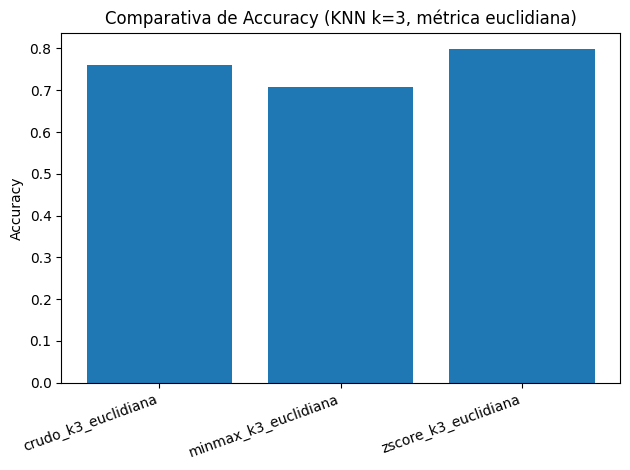


--- CONCLUSIÓN ---
✔ El mejor desempeño fue 'zscore_k3_euclidiana' con accuracy = 0.797.
   Frente al modelo crudo, la mejora es de 0.038 puntos (5.00%).

Archivos generados:
 - tabla_resultados_final.csv
 - comparativa_accuracy.png


In [1]:
import os, pandas as pd
import matplotlib.pyplot as plt

if not os.path.exists("tabla_resultados.csv"):
    raise FileNotFoundError("No existe tabla_resultados.csv.")

# 1) Cargar resultados y quedarnos con la última corrida de cada config
res = pd.read_csv("tabla_resultados.csv")
res = res.dropna(subset=["Configuracion", "Accuracy"])
res = res.groupby("Configuracion", as_index=False).tail(1)

# 2) Orden sugerido
orden = ["crudo_k3_euclidiana", "minmax_k3_euclidiana", "zscore_k3_euclidiana"]
res["orden"] = res["Configuracion"].map({k:i for i,k in enumerate(orden)})
res = res.sort_values(by=["orden", "Accuracy"], ascending=[True, False]).drop(columns="orden")

# 3) Mostrar tabla y guardar copia final
res_fmt = res.copy()
res_fmt["Accuracy_%"] = (res_fmt["Accuracy"]*100).round(2)
display(res_fmt[["Configuracion","Accuracy","Accuracy_%"]])
res_fmt.to_csv("tabla_resultados_final.csv", index=False)

# 4) Gráfica
plt.figure()
plt.bar(res["Configuracion"], res["Accuracy"])
plt.title("Comparativa de Accuracy (KNN k=3, métrica euclidiana)")
plt.ylabel("Accuracy")
plt.xticks(rotation=20, ha="right")
plt.tight_layout()
plt.savefig("comparativa_accuracy.png", dpi=150)
plt.show()

# 5) Conclusión automática
acc = {row["Configuracion"]: row["Accuracy"] for _, row in res.iterrows()}
base = acc.get("crudo_k3_euclidiana", None)
mejor_cfg = max(acc, key=acc.get)
mejor_val = acc[mejor_cfg]

print("\n--- CONCLUSIÓN ---")
if base is not None:
    mejora_abs = mejor_val - base
    mejora_rel = (mejora_abs / base * 100) if base > 0 else float('nan')
    print(f"✔ El mejor desempeño fue '{mejor_cfg}' con accuracy = {mejor_val:.3f}.")
    print(f"   Frente al modelo crudo, la mejora es de {mejora_abs:.3f} puntos "
          f"({mejora_rel:.2f}%).")
else:
    print(f"✔ El mejor desempeño fue '{mejor_cfg}' con accuracy = {mejor_val:.3f}.")
    print("   (No se encontró la configuración 'crudo_k3_euclidiana' para comparar).")

print("\nArchivos generados:")
print(" - tabla_resultados_final.csv")
print(" - comparativa_accuracy.png")


---
## Preguntas de reflexión y aplicación



1. ¿Por qué es importante normalizar o estandarizar los datos antes de usar KNN?  



Porque KNN decide por distancias. Si una variable está en metros (0–200) y otra en años (0–80), la de metros “pesa” más y tuerce la decisión.
Normalizar/Estandarizar pone todas las variables en la misma escala, hace el modelo más justo y suele mejorar el accuracy.ponda aqui

2. ¿Qué diferencias observaste en el accuracy entre los datos crudos, normalizados y estandarizados?  


Crudos → peor o inestable (cada variable con su escala).

Min-Max → suele subir el accuracy porque todo queda en 0–1.

Z-score → parecido o a veces mejor que Min-Max cuando hay variables con distribución “tipo normal”.

3. Si aumentamos el valor de **k** (número de vecinos), ¿cómo crees que cambiaría el rendimiento del modelo?  


Responda aqui

k pequeño: muy sensible al ruido (tiende a sobreajuste).

k mediano: equilibrio, suele dar el mejor rendimiento.

k grande: la frontera se vuelve “suave”, puede subajustar y bajar el accuracy.
En resumen: elige k con validación (odd: 3,5,7… para evitar empates).

4. ¿Qué ventaja tiene implementar KNN manualmente antes de usar scikit-learn?  


Entiendes paso a paso qué hace el algoritmo (cálculo de distancias, voto, empates).
Te da control (métrica, pesos, reglas de desempate) y te ayuda a diagnosticar errores.
Después, usar scikit-learn es más rápido y limpio, pero ya sabes qué hay debajo.

5. ¿Qué limitaciones presenta KNN cuando se aplica a conjuntos de datos grandes o con muchas dimensiones?  

Lento al predecir: hay que calcular distancias contra todos los puntos de train.

Mucha memoria: guarda todo el conjunto de entrenamiento.

Curse of dimensionality: en alta dimensión las distancias se parecen y KNN pierde poder.

Sensible a variables irrelevantes y a la escala (por eso hay que escalar/seleccionar features).

---

## Rúbrica de evaluación: Práctica KNN

| Criterio | Descripción | Puntaje Máximo |
|----------|-------------|----------------|
| **1. Carga y exploración del dataset** | Carga correcta del archivo CSV, explicación de las variables y verificación de datos. | 15 pts |
| **2. Implementación manual de KNN** | Código propio para calcular distancias euclidianas, selección de vecinos y votación mayoritaria. | 20 pts |
| **3. Predicción individual (ejemplo aleatorio)** | Explicación clara del proceso paso a paso para un ejemplo de test. | 10 pts |
| **4. Uso de scikit-learn (KNN)** | Entrenamiento y evaluación con `train_test_split`, comparación con el método manual. | 15 pts |
| **5. Normalización y estandarización** | Aplicación correcta de Min-Max y Z-score, con cálculo de accuracy en cada caso. | 20 pts |
| **6. Tabla comparativa de accuracies** | Presentación clara de los resultados y comparación entre métodos. | 10 pts |
| **7. Reflexión y preguntas finales** | Respuestas a las preguntas de análisis planteadas (profundidad y claridad). | 10 pts |

**Total: 100 pts**
